In [22]:
# Using Pandas for Data processing 
import pandas as pd 
# Using numpy for linear Algebra
import numpy as np
# The OS 
import os
# Specifying the path and Traversing The Data Path
dataset_path = os.path.expanduser('Datasets')
#looping the dataset files 
filecount = 0
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))
        filecount += 1
        
print(filecount)

Datasets/normal/1.jpg
Datasets/normal/10.jpg
Datasets/normal/100.jpg
Datasets/normal/101.jpg
Datasets/normal/102.jpg
Datasets/normal/103.jpg
Datasets/normal/104.jpg
Datasets/normal/105.jpg
Datasets/normal/106.jpg
Datasets/normal/107.jpg
Datasets/normal/108.jpg
Datasets/normal/109.jpg
Datasets/normal/11.jpg
Datasets/normal/110.jpg
Datasets/normal/111.jpg
Datasets/normal/112.jpg
Datasets/normal/113.jpg
Datasets/normal/114.jpg
Datasets/normal/115.jpg
Datasets/normal/116.jpg
Datasets/normal/117.jpg
Datasets/normal/118.jpg
Datasets/normal/119.jpg
Datasets/normal/12.jpg
Datasets/normal/120.jpg
Datasets/normal/121.jpg
Datasets/normal/122.jpg
Datasets/normal/123.jpg
Datasets/normal/124.jpg
Datasets/normal/125.jpg
Datasets/normal/126.jpg
Datasets/normal/127.jpg
Datasets/normal/128.jpg
Datasets/normal/129.jpg
Datasets/normal/13.jpg
Datasets/normal/130.jpg
Datasets/normal/131.jpg
Datasets/normal/132.jpg
Datasets/normal/133.jpg
Datasets/normal/134.jpg
Datasets/normal/135.jpg
Datasets/normal/136.jp

In [252]:
# Adding Other libraries (TENSORFLOW)
import tensorflow as tf
# image processing using keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# CV2 to read the image
import cv2
# plot the image on a graph
import matplotlib.pyplot as plt


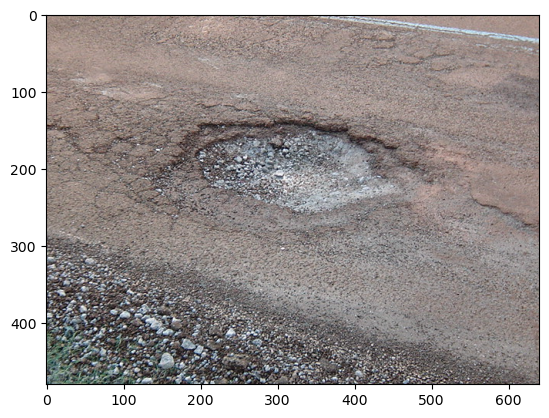

In [270]:
plt.imshow(cv2.imread("C:/Users/ajayb/Desktop/Dataset/potholes/123.jpg"))

#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

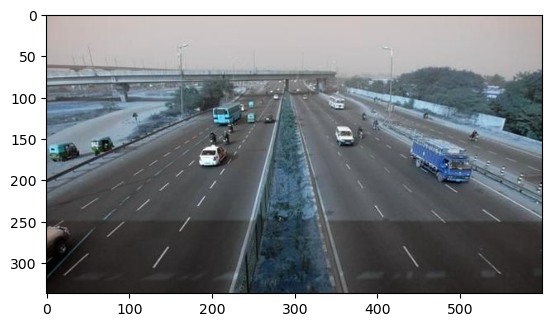

In [254]:
plt.imshow(cv2.imread("C:/Users/ajayb/Desktop/Dataset/normal/60.jpg"))

In [255]:
data_train = ImageDataGenerator(rescale = 1./255,
                               shear_range =0.2,
                               horizontal_flip = True,
                               validation_split=0.2)

data_training = data_train.flow_from_directory('C:/Users/ajayb/Desktop/Dataset',
                                             target_size =(64, 64),
                                             batch_size = 32,
                                             class_mode ='binary',
                                             subset='training')

Found 546 images belonging to 2 classes.


In [257]:
data_validation = data_train.flow_from_directory('C:/Users/ajayb/Desktop/Dataset',
                                             target_size =(64, 64),
                                             batch_size = 32,
                                             class_mode ='binary',
                                             subset='validation')

Found 135 images belonging to 2 classes.


In [258]:
# Sequential Model Using CNN(convolutional nueral network)
cnn = Sequential([
        # Add the first layer of cnn using convolution filter
        Conv2D(filters=32, kernel_size=4, activation='relu', input_shape=[64,  64, 3]),
        # using the max pooling, with two strides
        MaxPool2D(2, 2),
#         # Second layer 
#         Conv2D(filters=16, kernel_size=3, activation='relu'),
#         # using max poling
#         MaxPool2D(2, 2),
        # Second layer 
        Conv2D(filters=32, kernel_size=4, activation='relu'),
        # using max poling
        MaxPool2D(2, 2),
       

        # Adding the Flatten layer before being fed into the neural network
        Flatten(),
        #one 
        #Dense(units=284, activation='relu', name='layer'),
        # Adding One Dense layer of the neural network with 128 neurons 
        Dense(units=128, activation='relu'),
        # Lastly the final output layers, using the sigmoid activation
        Dense(units=1, activation='sigmoid')
])



In [259]:
# Now Compiling With The Optimizer Adam
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )


In [263]:
# Traning The Model
cnn.fit(x = data_training, validation_data = data_validation, epochs=20)
print(cnn.summary())

Epoch 1/20
18/18 [==============================] - 19s 1s/step - loss: 3.8147e-08 - accuracy: 1.0000 - val_loss: 1.0849 - val_accuracy: 0.8815
Epoch 2/20
18/18 [==============================] - 18s 1s/step - loss: 3.7106e-08 - accuracy: 1.0000 - val_loss: 1.4340 - val_accuracy: 0.8963
Epoch 3/20
18/18 [==============================] - 19s 1s/step - loss: 3.8712e-08 - accuracy: 1.0000 - val_loss: 1.2194 - val_accuracy: 0.8815
Epoch 4/20
18/18 [==============================] - 19s 1s/step - loss: 3.8668e-08 - accuracy: 1.0000 - val_loss: 1.3377 - val_accuracy: 0.8667
Epoch 5/20
18/18 [==============================] - 20s 1s/step - loss: 3.3450e-08 - accuracy: 1.0000 - val_loss: 1.0884 - val_accuracy: 0.8815
Epoch 6/20
18/18 [==============================] - 19s 1s/step - loss: 3.6192e-08 - accuracy: 1.0000 - val_loss: 1.2870 - val_accuracy: 0.8667
Epoch 7/20
18/18 [==============================] - 19s 1s/step - loss: 3.6436e-08 - accuracy: 1.0000 - val_loss: 1.4226 - val_accuracy:

In [267]:
cnn.evaluate(data_training)

18/18 [==============================] - 14s 762ms/step - loss: 2.9090e-08 - accuracy: 1.0000


[2.908980079041612e-08, 1.0]

In [271]:
# Making Dectections
image_test = load_img('C:/Users/ajayb/Desktop/Dataset/potholes/123.jpg', target_size=(64, 64))
image_test = img_to_array(image_test)
image_test = np.expand_dims(image_test, axis = 0)

result = cnn.predict(image_test)
data_training.class_indices

prediction = 'potholes' if result[0][0] == 1 else 'normal'

# if result[0][0] == 1:
#     prediction = 'potholes'
                      
# else:
#     prediction = 'normal'
    
print(prediction)
    


1/1 [==============================] - 0s 54ms/step
potholes
